In [428]:
import pandas as pd
import matplotlib.pyplot as plt

In [429]:
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")

#Visualizza le prime 5 righe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [430]:
#Riepilogo delle statistiche descrittive 
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [431]:
#Riepilogo di colonne , valori non nulli e tipi di dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [432]:
# Conta le occorrenze di ogni descrizione
top_descriptions = df["Description"].value_counts().head(30)

print(top_descriptions)


Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
PAPER CHAIN KIT 50'S CHRISTMAS        1210
JUMBO SHOPPER VINTAGE RED PAISLEY     1202
LUNCH BAG CARS BLUE                   1197
LUNCH BAG SPACEBOY DESIGN             1192
JAM MAKING SET PRINTED                1182
RECIPE BOX PANTRY YELLOW DESIGN       1180
SPOTTY BUNTING                        1172
LUNCH BAG SUKI DESIGN                 1139

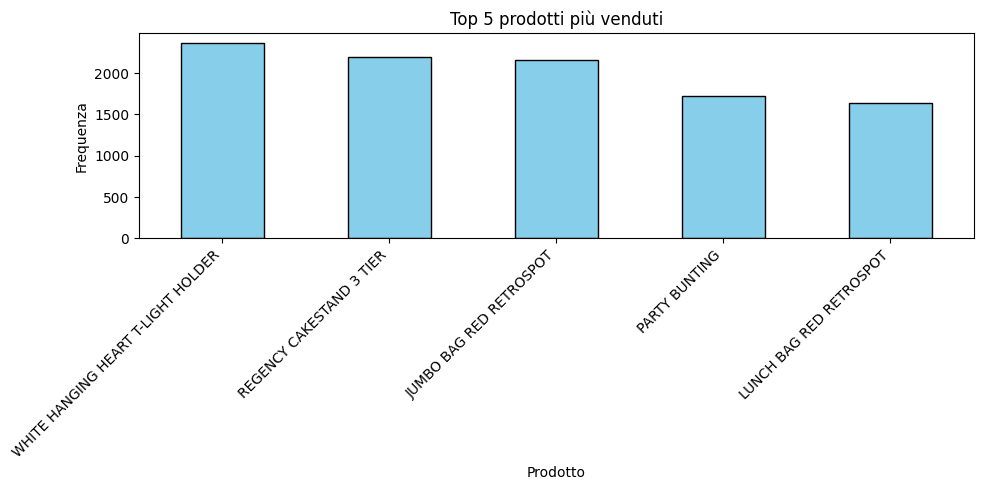

In [433]:
# Conta le occorrenze e prendi i primi 5
top5 = df["Description"].value_counts().head(5)

# Grafico a barre
plt.figure(figsize=(10,5))
top5.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 5 prodotti più venduti")
plt.xlabel("Prodotto")
plt.ylabel("Frequenza")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [434]:
# Conta le occorrenze di ogni Description
counts = df["Description"].value_counts()

# Trova le descrizioni con almeno 2000 occorrenze
valid_descriptions = counts[counts >= 2000].index

# Filtra il dataframe mantenendo solo quelle righe
df = df[df["Description"].isin(valid_descriptions)]


In [435]:
#Eliminiamo le righe che non hanno ID
df = df.dropna(subset=["CustomerID"])

#Converte l'ID da float ad intero
df["CustomerID"] = df["CustomerID"].astype(int)


In [436]:
# Filtra solo le righe con quantità > 0 e prezzo > 0
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]


In [437]:
#rimozione outlier

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Applica su colonne Quantity e UnitPrice
df = remove_outliers_iqr(df, "Quantity")
df = remove_outliers_iqr(df, "UnitPrice")


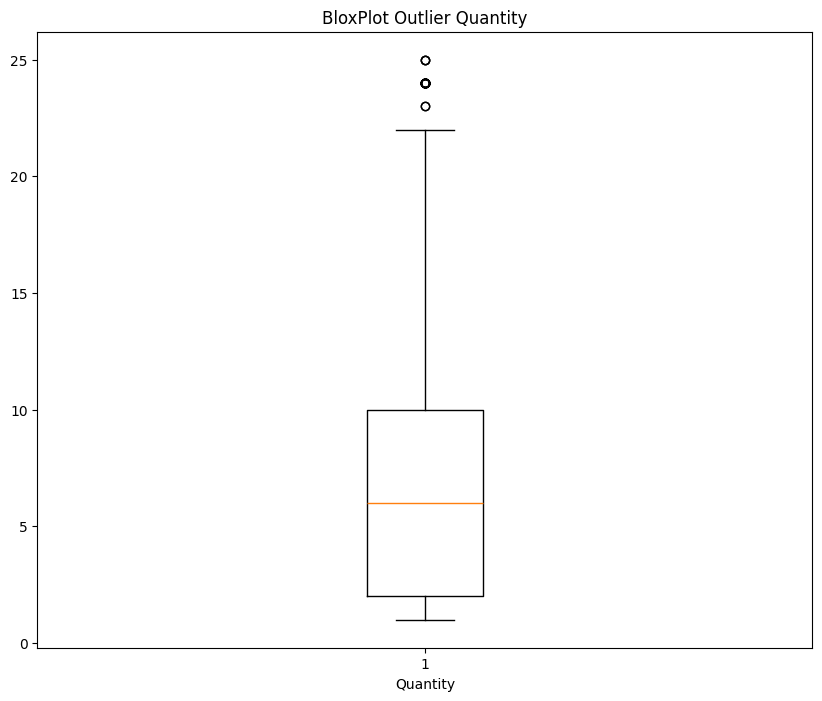

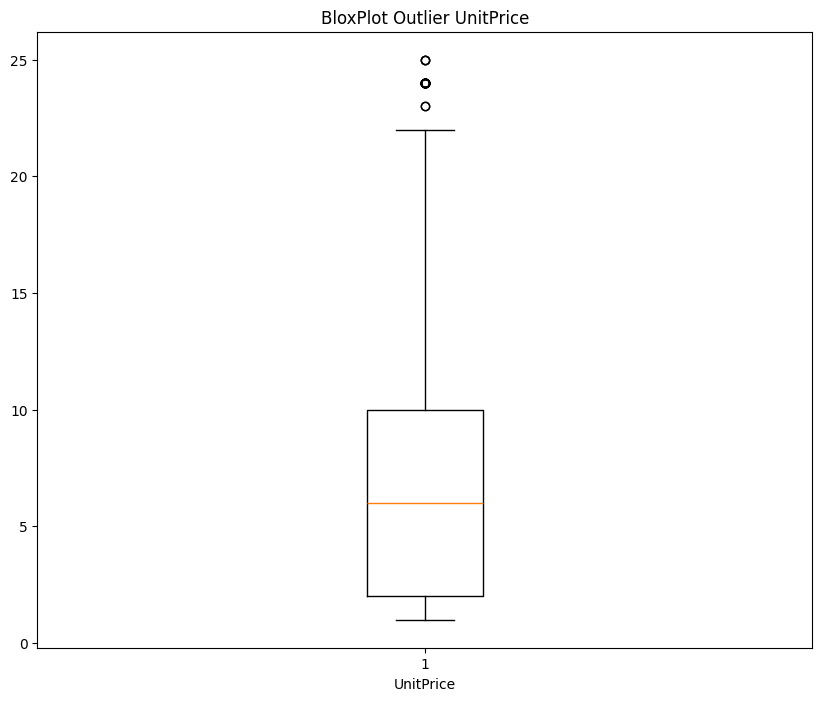

In [438]:
#Grafico BloxPlot per Outlier

plt.figure(figsize=(10,8))
plt.boxplot(df["Quantity"])
plt.title("BloxPlot Outlier Quantity")
plt.xlabel("Quantity")
plt.show()


plt.figure(figsize=(10,8))
plt.boxplot(df["Quantity"])
plt.title("BloxPlot Outlier UnitPrice")
plt.xlabel("UnitPrice")
plt.show()

In [439]:
#Creazione colonna TotalPrice

df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

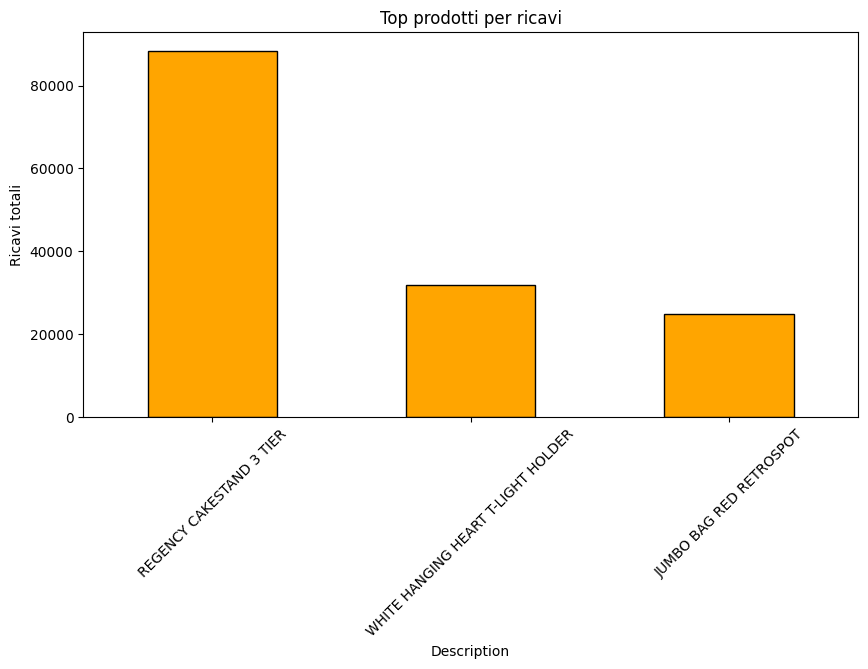

In [440]:
#Grafico che mostra i prodotti top in base al total price

top_products = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(3)
top_products.plot(kind="bar", figsize=(10,5), color="orange", edgecolor="black")
plt.title("Top prodotti per ricavi")
plt.ylabel("Ricavi totali")
plt.xticks(rotation=45)
plt.show()


In [441]:
#Creazione di feature temporali per capire l'andamento di vendite nel tempo , se ci sono giorni più forti e fasce orarie con più forti 
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.month
df["Weekday"] = df["InvoiceDate"].dt.weekday
df["Hour"] = df["InvoiceDate"].dt.hour



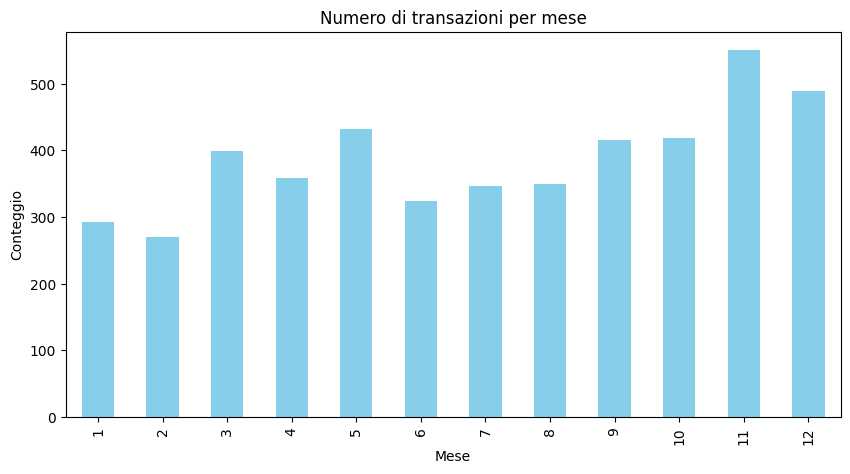

In [ ]:
#Grafico che mostra in quale mese il numero di transazioni è più alto 

df["Month"].value_counts().sort_index().plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Numero di transazioni per mese")
plt.xlabel("Mese")
plt.ylabel("Conteggio")
plt.show()


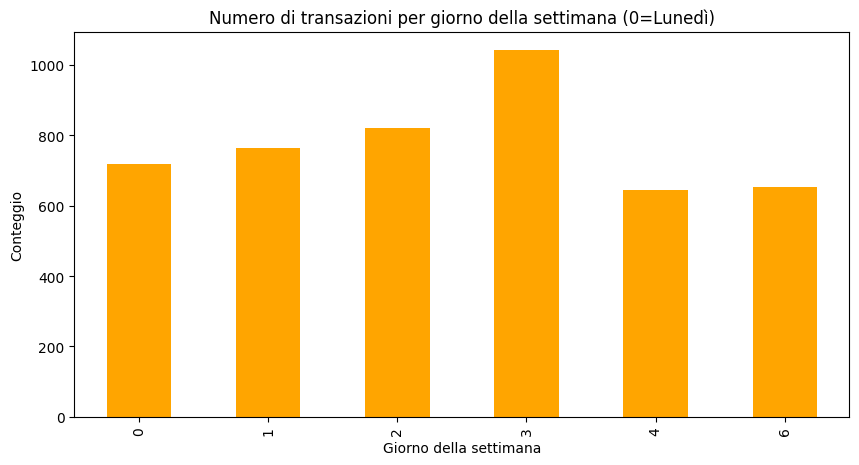

In [ ]:
#Grafico che mostra in quale giorno della settimana il numero di transazioni è più alto 


df["Weekday"].value_counts().sort_index().plot(kind="bar", figsize=(10,5), color="orange")
plt.title("Numero di transazioni per giorno della settimana (0=Lunedì)")
plt.xlabel("Giorno della settimana")
plt.ylabel("Conteggio")
plt.show()



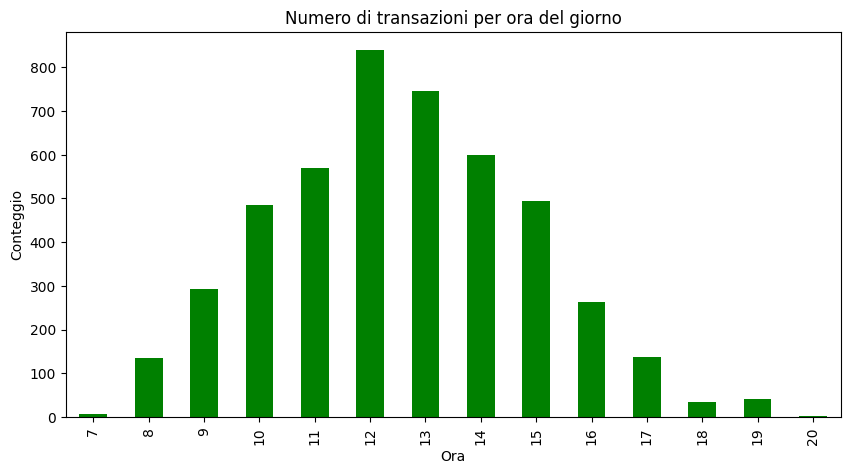

In [ ]:
#Grafico che mostra il numero di transazione per le ore del giorno

df["Hour"].value_counts().sort_index().plot(kind="bar", figsize=(10,5), color="green")
plt.title("Numero di transazioni per ora del giorno")
plt.xlabel("Ora")
plt.ylabel("Conteggio")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Definisco feature e Target
X = df[["Quantity", "UnitPrice", "Month", "Weekday", "Hour"]]
y = df["TotalPrice"]


# Divido il dataset in training set (80%) e test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creo il modello di LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # Alleno il modello sui dati di training

y_pred = lin_reg.predict(X_test) # Faccio le predizioni sul set di test

#Calcolo Rmse e R2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)



RMSE: 22.869688044932463
R²: 0.6490532278018509


In [ ]:
from xgboost import XGBRegressor

# Features e target
X = df[["Quantity", "UnitPrice", "Month", "Weekday", "Hour"]]
y = df["TotalPrice"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modello XGBoost
xgb_model = XGBRegressor(
    objective="reg:squarederror", 
    n_estimators=300,             
    learning_rate=0.1,              
    max_depth=6,                    
    subsample=0.8,                 
    colsample_bytree=0.8,           
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predizioni
y_pred = xgb_model.predict(X_test)

# Metriche
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 3.533559992315865
R²: 0.9916218967284126


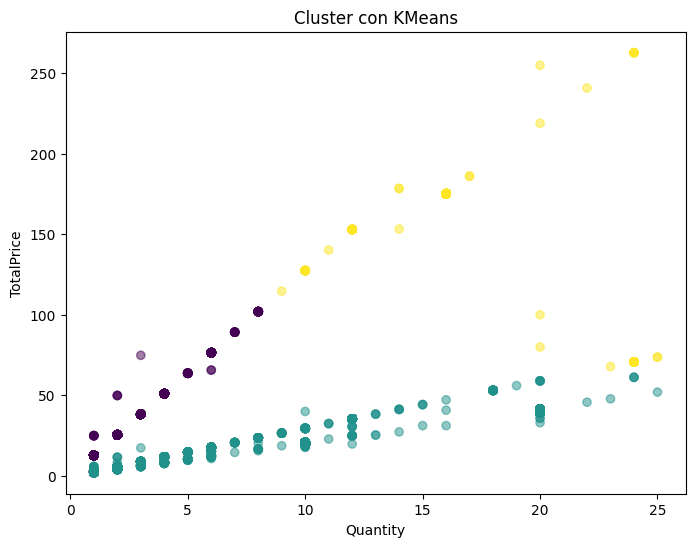

In [447]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Prendiamo solo alcune feature utili
X = df[["Quantity", "UnitPrice", "TotalPrice"]]

# Standardizziamo i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applichiamo KMeans con 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualizziamo i cluster con due variabili
plt.figure(figsize=(8,6))
plt.scatter(df["Quantity"], df["TotalPrice"], c=df["Cluster"], cmap="viridis", alpha=0.5)
plt.title("Cluster con KMeans")
plt.xlabel("Quantity")
plt.ylabel("TotalPrice")
plt.show()


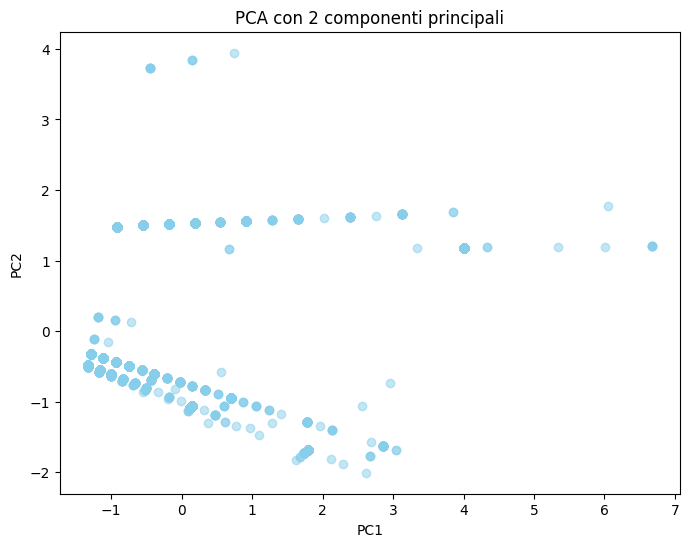

Varianza spiegata da PC1 e PC2: [0.51973289 0.42868969]


In [448]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Prendiamo alcune feature numeriche
X = df[["Quantity", "UnitPrice", "TotalPrice"]]

# Standardizziamo i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA con 2 componenti principali
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizzazione
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color="skyblue")
plt.title("PCA con 2 componenti principali")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Varianza spiegata
print("Varianza spiegata da PC1 e PC2:", pca.explained_variance_ratio_)
